<a href="https://colab.research.google.com/github/b-li111/linearModels/blob/main/Linear_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

         Make  Make_Year   Color  Body_Type  Mileage_Run No_of_Owners  \
0  Volkswagen       2017  silver      sedan        44611          1st   
1     Hyundai       2016     red  crossover        20305          1st   
2       Honda       2019   white        suv        29540          2nd   
3     Renault       2017  bronze  hatchback        35680          1st   
4     Hyundai       2017  orange  hatchback        25126          1st   

   Seating_Capacity Fuel_Type Transmission Transmission_Type   Price  
0                 5    diesel      7-Speed         Automatic  657000  
1                 5    petrol      5-Speed            Manual  682000  
2                 5    petrol      5-Speed            Manual  793000  
3                 5    petrol      5-Speed            Manual  414000  
4                 5    petrol      5-Speed            Manual  515000  
Make                 0
Make_Year            0
Color                0
Body_Type            0
Mileage_Run          0
No_of_Owners        

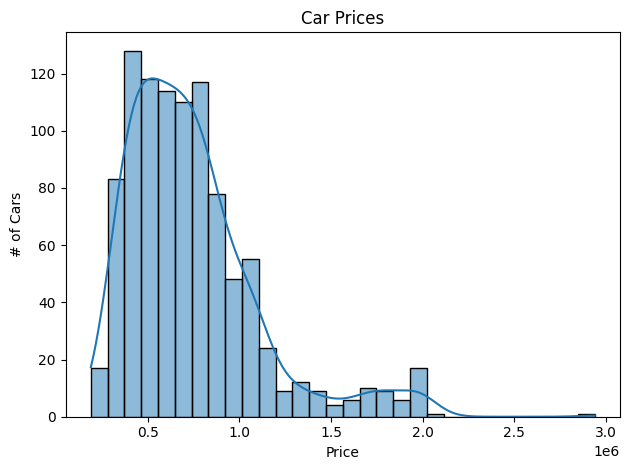

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cars_hw.csv")
df = df.drop(columns=['Unnamed: 0'])

print(df.head())
print(df.isnull().sum())


print("\nSummary stats:")
print(df.describe(include='all'))


sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Car Prices')
plt.xlabel('Price')
plt.ylabel('# of Cars')
plt.tight_layout()
plt.show()



In [5]:

df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded.head())


   Make_Year  Mileage_Run  Seating_Capacity   Price  Make_Datsun  Make_Ford  \
0       2017        44611                 5  657000        False      False   
1       2016        20305                 5  682000        False      False   
2       2019        29540                 5  793000        False      False   
3       2017        35680                 5  414000        False      False   
4       2017        25126                 5  515000        False      False   

   Make_Honda  Make_Hyundai  Make_Jeep  Make_Kia  ...  Body_Type_suv  \
0       False         False      False     False  ...          False   
1       False          True      False     False  ...          False   
2        True         False      False     False  ...           True   
3       False         False      False     False  ...          False   
4       False          True      False     False  ...          False   

   No_of_Owners_2nd  No_of_Owners_3rd  Fuel_Type_petrol  Fuel_Type_petrol+cng  \
0          

In [6]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop(columns=['Price'])  # features
y = df_encoded['Price']                # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("train data shape:", X_train.shape)
print("test data shape:", X_test.shape)


train data shape: (780, 45)
test data shape: (196, 45)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)
train_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)


train_rmse = np.sqrt(mean_squared_error(y_train, train_prediction))
test_rmse = np.sqrt(mean_squared_error(y_test, test_prediction))

train_r2 = r2_score(y_train, train_prediction)
test_r2 = r2_score(y_test, test_prediction)

# Print out the results
print("training RMSE:", round(train_rmse, 2))
print("test RMSE:", round(test_rmse, 2))
print("training R2:", round(train_r2, 4))
print("test R2:", round(test_r2, 4))


training RMSE: 142114.26
test RMSE: 143575.2
training R²: 0.8553
test R²: 0.8203


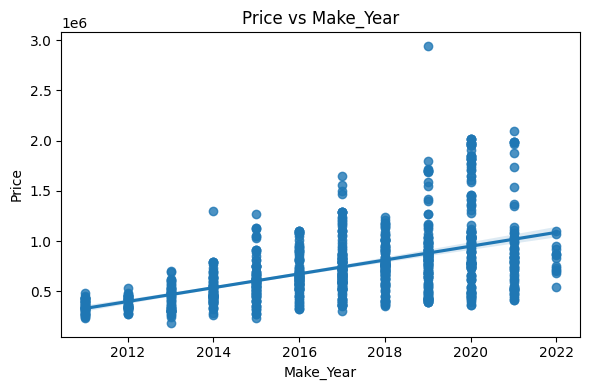

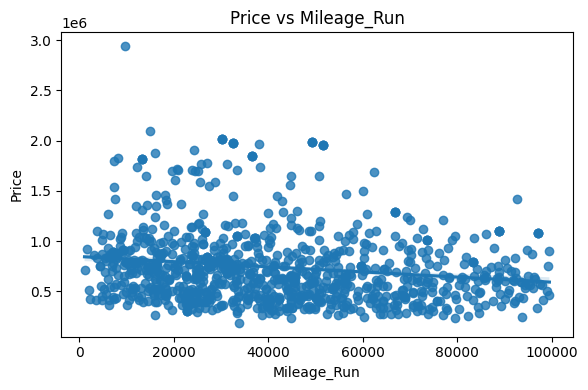

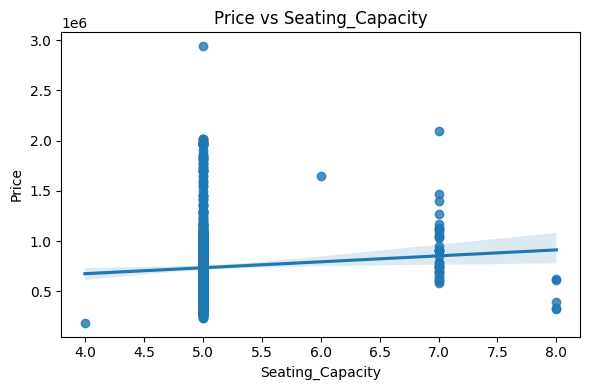

In [11]:

numeric_cols = ['Make_Year', 'Mileage_Run', 'Seating_Capacity']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=df[col], y=df['Price'])
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.tight_layout()
    plt.show()



5. They look fairly linear, particularly make year and price. mileage run and price has some nonlinear behavior-- but it was hard to tell, the pattern seemed noisy. Not as linear as make year and price. Seating capacity was not particularly linear, as most cars were clustered at 5 seats. Only a few had 7 or 8, and the line pattern began to vary-- the prices for 8 seaters were about as low as 4 seaters. So definitely some non-linearity.


In [12]:

X_train2 = X_train.copy()
X_test2 = X_test.copy()
X_train2['Mileage_Run_squared'] = X_train2['Mileage_Run'] ** 2
X_test2['Mileage_Run_squared'] = X_test2['Mileage_Run'] ** 2
X_train2['Year_Mileage_interaction'] = X_train2['Make_Year'] * X_train2['Mileage_Run']
X_test2['Year_Mileage_interaction'] = X_test2['Make_Year'] * X_test2['Mileage_Run']


model_complex = LinearRegression()
model_complex.fit(X_train2, y_train)

# Predict
train_preds_complex = model_complex.predict(X_train2)
test_preds_complex = model_complex.predict(X_test2)

# Evaluate
train_rmse_complex = np.sqrt(mean_squared_error(y_train, train_preds_complex))
test_rmse_complex = np.sqrt(mean_squared_error(y_test, test_preds_complex))

train_r2_complex = r2_score(y_train, train_preds_complex)
test_r2_complex = r2_score(y_test, test_preds_complex)

# Results
print("complex model:")
print("train RMSE:", round(train_rmse_complex, 2))
print("test RMSE:", round(test_rmse_complex, 2))
print("train R2:", round(train_r2_complex, 4))
print("test R2:", round(test_r2_complex, 4))


complex model:
train RMSE: 141725.59
test RMSE: 143132.23
train R²: 0.8561
test R²: 0.8214


This more complex model returned a slightly better R squared and RMSE, but fairly minimal. It did help capture a bit more complexity in the data, but again, minorly. The model also didn't seem overfitted, since the R2 improved a bit. Overall, the complex model is slightly better, though not majorly so.

7. I built models to predict car prices. I first cleaned the data and checked for missing values. Then i used one-hot encoding to make categorical features into numbers. Then I did a simple linear regression, which performed pretty well with an r2 of .8553 on the training data and .8203 on the test set. Then i made a more complex model-- i squared mileage-run and added an interaction between make-year and mileage-run. this improved the r2 ever so slightly to .8214.
  The results didn't show major overfitting (because train and test scores were close). Overall I learned that adding transformations and interactions CAN improve the mdoel, but even a super simple model can perform very well as long as the feautres/data is properly prepared before that.


In [13]:
from sklearn.linear_model import Lasso


lasso_model = Lasso(alpha=100.0)
lasso_model.fit(X_train2, y_train)


train_predictions_lasso = lasso_model.predict(X_train2)
test_predictions_lasso = lasso_model.predict(X_test2)


train_rmse_lasso = np.sqrt(mean_squared_error(y_train, train_predictions_lasso))
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, test_predictions_lasso))
train_r2_lasso = r2_score(y_train, train_predictions_lasso)
test_r2_lasso = r2_score(y_test, test_predictions_lasso)

print("lasso :")
print("train RMSE:", round(train_rmse_lasso, 2))
print("test RMSE:", round(test_rmse_lasso, 2))
print("train R2:", round(train_r2_lasso, 4))
print("test R2:", round(test_r2_lasso, 4))

lasso_features = pd.Series(lasso_model.coef_, index=X_train2.columns)
print("\nfeatures chosen by Lasso :")
print(lasso_features[lasso_features != 0])


lasso :
train RMSE: 142516.22
test RMSE: 144301.42
train R²: 0.8545
test R²: 0.8185

features chosen by Lasso :
Make_Year                    44605.008501
Mileage_Run                      0.501142
Seating_Capacity            110047.216380
Make_Ford                   -84813.778674
Make_Honda                   53362.622294
Make_Hyundai                 54151.139083
Make_Jeep                   415757.168531
Make_Kia                    457585.520602
Make_MG Motors              709412.005560
Make_Mahindra               -72102.791242
Make_Maruti Suzuki            8581.678354
Make_Renault               -126361.818523
Make_Skoda                  502686.897217
Make_Tata                   134881.448317
Make_Toyota                  91878.326937
Make_Volkswagen               8894.769158
Color_black                 114357.151007
Color_blue                   91263.455471
Color_brown                  97108.107348
Color_grey                   65173.520055
Color_maroon                 62799.408043
Color_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.329e+12, tolerance: 1.089e+10
  model = cd_fast.enet_coordinate_descent(


8. the lasso model chose make-year, make-jeep, and make-kia as the largest positive indicators of price. And it chose fuel-type-petrol and body-type-hatchback as negative indicators. the train r2 was .8545, the test r2 was .8185. This was close to the other models, but lasso provided a list of features with the biggest impact on price, which was helpful. It also reduced the insignificant features to almost zero, which helped clarify what really made a difference without oversimplifying the model.

